In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
a3d_scores = pd.read_csv('./../data/aggrescan3d/a3d_A1KXE4/A3D.csv')

In [6]:
a3d_scores

,protein,chain,residue,residue_name,score
0,folded,A,1,M,0.6077
1,folded,A,2,N,-0.2283
2,folded,A,3,P,0.5926
3,folded,A,4,V,1.9895
4,folded,A,5,Y,1.6924
...,...,...,...,...,...
190,folded,A,191,V,2.1707
191,folded,A,192,P,0.6687
192,folded,A,193,P,-0.0385
193,folded,A,194,Q,-0.5722


In [21]:
pd.reset_option('display.max_columns')


In [8]:
threshold = 0.5
start = 1
end = 106
high_score_residues = a3d_scores[(a3d_scores['score'] > threshold) & (a3d_scores['residue'] >= start) & (a3d_scores['residue'] <= end)]
high_score_residues

,protein,chain,residue,residue_name,score
0,folded,A,1,M,0.6077
2,folded,A,3,P,0.5926
3,folded,A,4,V,1.9895
4,folded,A,5,Y,1.6924
5,folded,A,6,S,0.6353
11,folded,A,12,V,1.5621
12,folded,A,13,P,1.3949
13,folded,A,14,Y,1.8083
14,folded,A,15,A,0.7950
19,folded,A,20,I,1.2928


In [9]:
from Bio.PDB import PDBParser

pdb_file = "./../data/PLAAC_PDBs/A1KXE4.pdb"
parser = PDBParser()
structure = parser.get_structure("protein", pdb_file)

res_coords = []
res_ids = []

for model in structure:
    for chain in model:
        for residue in chain:
            res_id = residue.get_id()[1]
            chain_id = chain.get_id()
            
            # Match residues with high A3D score
            if ((high_score_residues["residue"] == res_id) & (high_score_residues["chain"] == chain_id)).any():
                if "CA" in residue:
                    coord = residue["CA"].get_coord()
                    res_coords.append(coord)
                    res_ids.append((chain_id, res_id))

In [10]:
res_coords

[array([-14.001,   9.905,  23.168], dtype=float32),
 array([-14.489,  12.15 ,  17.3  ], dtype=float32),
 array([-17.15 ,  14.75 ,  16.436], dtype=float32),
 array([-17.419,  14.76 ,  12.642], dtype=float32),
 array([-17.694,  18.507,  12.144], dtype=float32),
 array([-9.586, 22.263,  2.656], dtype=float32),
 array([-6.771, 19.754,  1.837], dtype=float32),
 array([-6.821, 16.881,  4.336], dtype=float32),
 array([-3.152, 16.665,  5.35 ], dtype=float32),
 array([ 1.056, 13.951,  1.949], dtype=float32),
 array([-1.409, 16.603,  0.774], dtype=float32),
 array([-3.769, 15.186, -1.852], dtype=float32),
 array([-4.515, 17.905, -4.476], dtype=float32),
 array([-8.113, 19.174, -4.256], dtype=float32),
 array([-8.913, 17.878, -7.759], dtype=float32),
 array([-11.269,  14.933,  -8.051], dtype=float32),
 array([-13.635,  15.76 , -10.966], dtype=float32),
 array([-17.059,  16.398,  -9.421], dtype=float32),
 array([-18.515,  14.854, -12.576], dtype=float32),
 array([-20.894,  12.113, -11.803], dtype=

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np

X = np.array(res_coords)
clustering = DBSCAN(eps=10, min_samples=2).fit(X) 
labels = clustering.labels_

from collections import defaultdict

clusters = defaultdict(list)
for label, res in zip(labels, res_ids):
    if label != -1:
        clusters[label].append(res)

for cluster_id, residues in clusters.items():
    print(f"Cluster {cluster_id} (Aggregation Patch): {residues}")


Cluster 0 (Aggregation Patch): [('A', 1), ('A', 3), ('A', 4), ('A', 5), ('A', 6)]
Cluster 1 (Aggregation Patch): [('A', 12), ('A', 13), ('A', 14), ('A', 15), ('A', 20), ('A', 21), ('A', 22), ('A', 23), ('A', 24), ('A', 25), ('A', 26), ('A', 27), ('A', 28), ('A', 29), ('A', 30), ('A', 31)]
Cluster 2 (Aggregation Patch): [('A', 36), ('A', 37), ('A', 41), ('A', 42)]
Cluster 3 (Aggregation Patch): [('A', 49), ('A', 53), ('A', 59), ('A', 61), ('A', 62), ('A', 63)]
Cluster 4 (Aggregation Patch): [('A', 70), ('A', 71), ('A', 72), ('A', 73)]
Cluster 5 (Aggregation Patch): [('A', 83), ('A', 84), ('A', 85), ('A', 86), ('A', 87)]
Cluster 6 (Aggregation Patch): [('A', 103), ('A', 104)]


In [12]:
labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6])

In [13]:
from Bio.PDB import PDBParser

pdb_file = "./../data/PLAAC_PDBs/A1KXE4.pdb"
parser = PDBParser(QUIET=True)
structure = parser.get_structure("protein", pdb_file)

residue_coords = []

for model in structure:
    for chain in model:
        for residue in chain:
            res_id = residue.get_id()[1]  # get residue position
            if res_id:
                if "CA" in residue:  # Use alpha carbon for coordinate
                    coord = residue["CA"].get_coord()
                    residue_coords.append({
                        "chain": chain.id,
                        "residue_number": res_id,
                        "coord": coord
                    })

# Print extracted residue coordinates
for res in residue_coords:
    print(f"Chain {res['chain']} | Residue {res['residue_number']} | Coordinates: {res['coord']}")


Chain A | Residue 1 | Coordinates: [-14.001   9.905  23.168]
Chain A | Residue 2 | Coordinates: [-16.127   9.916  19.979]
Chain A | Residue 3 | Coordinates: [-14.489  12.15   17.3  ]
Chain A | Residue 4 | Coordinates: [-17.15   14.75   16.436]
Chain A | Residue 5 | Coordinates: [-17.419  14.76   12.642]
Chain A | Residue 6 | Coordinates: [-17.694  18.507  12.144]
Chain A | Residue 7 | Coordinates: [-18.643  19.044   8.448]
Chain A | Residue 8 | Coordinates: [-15.27   20.433   7.327]
Chain A | Residue 9 | Coordinates: [-15.637  23.153   4.666]
Chain A | Residue 10 | Coordinates: [-15.565  21.864   1.065]
Chain A | Residue 11 | Coordinates: [-12.058  22.68   -0.283]
Chain A | Residue 12 | Coordinates: [-9.586 22.263  2.656]
Chain A | Residue 13 | Coordinates: [-6.771 19.754  1.837]
Chain A | Residue 14 | Coordinates: [-6.821 16.881  4.336]
Chain A | Residue 15 | Coordinates: [-3.152 16.665  5.35 ]
Chain A | Residue 16 | Coordinates: [-2.544 13.182  6.775]
Chain A | Residue 17 | Coordinat

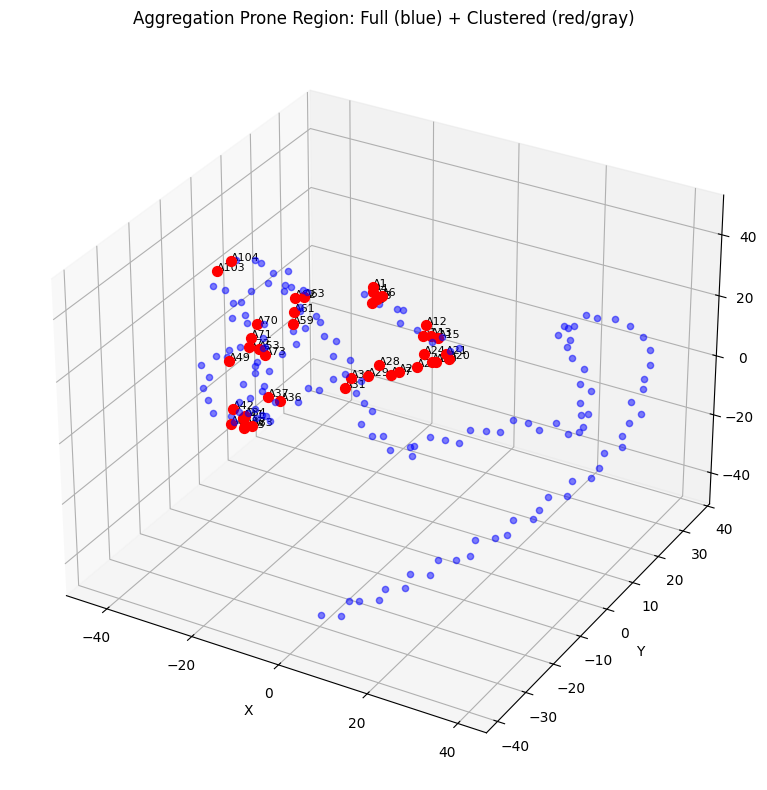

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for res in residue_coords:
    coord = res['coord']
    chain = res['chain']
    resnum = res['residue_number']
    ax.scatter(*coord, c='blue', s=20, alpha=0.5)

# 2. Overlay subset residues colored by cluster label
for label, coord, (chain, resnum) in zip(labels, res_coords, res_ids):
    color = 'red' if label != -1 else 'gray' 
    ax.scatter(*coord, c=color, s=50)

    ax.text(*coord, f"{chain}{resnum}", fontsize=8, color='black')

ax.set_title("Aggregation Prone Region: Full (blue) + Clustered (red/gray)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.tight_layout()
plt.show()


C:\Users\Nkris\AppData\Local\Temp\ipykernel_11028\3954209860.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', len(unique_labels))


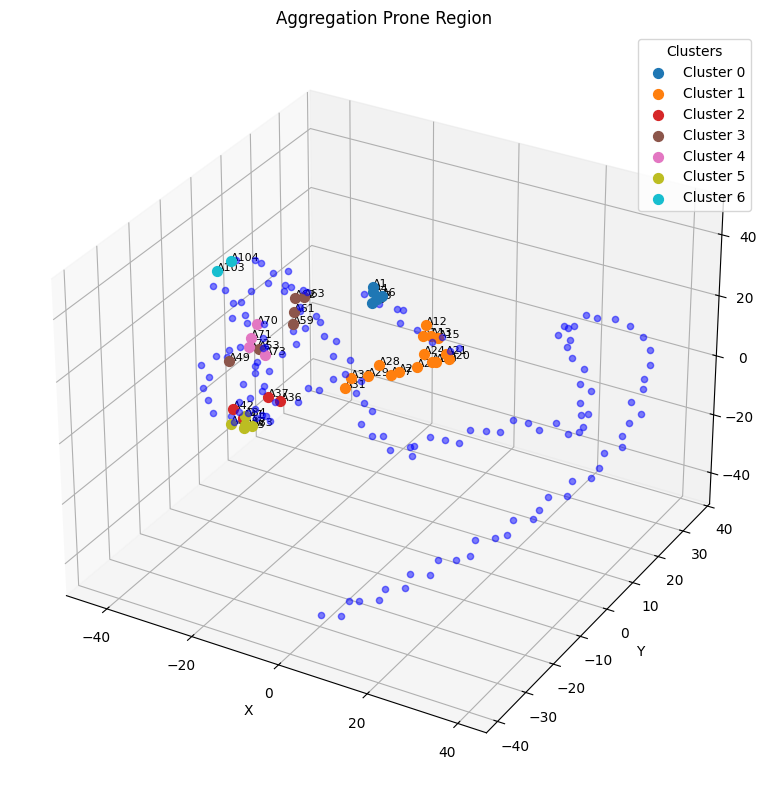

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot all residues in blue
for res in residue_coords:
    coord = res['coord']
    ax.scatter(*coord, c='blue', s=20, alpha=0.5)

# 2. Get unique cluster labels
unique_labels = set(labels)
cmap = cm.get_cmap('tab10', len(unique_labels))

# 3. Keep track of legend handles
plotted_labels = {}

# 4. Plot clustered residues with different colors
for i, (label, coord, (chain, resnum)) in enumerate(zip(labels, res_coords, res_ids)):
    if label == -1:
        color = 'gray'
        cluster_label = 'Noise'
    else:
        color = cmap(label % cmap.N)
        cluster_label = f'Cluster {label}'

    # Only add legend once per cluster label
    if cluster_label not in plotted_labels:
        sc = ax.scatter(*coord, c=[color], s=50, label=cluster_label)
        plotted_labels[cluster_label] = sc
    else:
        ax.scatter(*coord, c=[color], s=50)

    # Add residue label
    ax.text(*coord, f"{chain}{resnum}", fontsize=8, color='black')

# 5. Add legend
ax.legend(title="Clusters", loc='upper right')

# 6. Labels and layout
ax.set_title("Aggregation Prone Region")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.tight_layout()
plt.show()


In [19]:
pip install plotly


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------- ----------------------------- 2.6/9.6 MB 15.0 MB/s eta 0:00:01
   --------------------------- ------------ 6.6/9.6 MB 16.8 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 16.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Nkris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [26]:
import plotly.graph_objs as go
import numpy as np
import plotly.express as px

# === 1. Extract coords and labels ===

# All residue coordinates (background in blue)
full_coords = np.array([res['coord'] for res in residue_coords])

# Clustered subset
cluster_coords = np.array(res_coords)
chain_res_ids = [f"{chain}{resnum}" for (chain, resnum) in res_ids]

# Unique DBSCAN labels
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

# Assign a color per cluster
color_map = px.colors.qualitative.Plotly
label_colors = {
    label: 'gray' if label == -1 else color_map[label % len(color_map)]
    for label in unique_labels
}

# === 2. Plot traces ===

# 2.1 Background residues (all)
trace_all = go.Scatter3d(
    x=full_coords[:, 0],
    y=full_coords[:, 1],
    z=full_coords[:, 2],
    mode='markers',
    marker=dict(size=3, color='blue', opacity=0.2),
    name='All Residues',
    hoverinfo='skip'
)

# 2.2 Clustered residues (colored by cluster)
cluster_traces = []
for label in unique_labels:
    color = label_colors[label]
    indices = [i for i, l in enumerate(labels) if l == label]
    
    coords = cluster_coords[indices]
    hover_texts = [chain_res_ids[i] for i in indices]

    trace = go.Scatter3d(
        x=coords[:, 0],
        y=coords[:, 1],
        z=coords[:, 2],
        mode='markers+text',
        text=hover_texts,
        textposition="top center",
        marker=dict(size=6, color=color, opacity=0.8),
        name=f"Cluster {label}" if label != -1 else "Noise"
    )
    cluster_traces.append(trace)

# === 3. Combine and show ===

fig = go.Figure(data=[trace_all] + cluster_traces)
fig.update_layout(
    title=f"DBSCAN Clustering of Aggregation-Prone Residues<br><sup>{n_clusters} clusters, noise in gray</sup>",
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
    ),
    legend=dict(itemsizing='constant'),
    margin=dict(l=0, r=0, b=0, t=50)
)

fig.show(renderer="browser")



In [24]:
pip install nbformat


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Nkris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
